In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(),'Modules'))
import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def plot_metric(df, iv, metric, models, log_x=False):
    """
    df: DataFrame containing the results
    iv: name of the independent variable (e.g., 'Sample Size')
    metric: metric to plot (e.g., 'mse')
    models: list of models to include in the plot
    log_x: boolean indicating whether to use logarithmic scale for x-axis
    """
    
    # Filter the DataFrame for the specific metric
    filtered_df = df[df['Metric'] == metric]
    
    plt.figure(figsize=(8, 6))

    # Define a list of markers for variety
    markers = ['s', 'D', '^', 'v', 'p', '*', 'X']
    
    # Loop through each model specified in the models list
    for i, model in enumerate(models):
        metric_values = []
        errors = []
        iv_values = filtered_df[iv].unique()

        for value in iv_values:
            # Get data for the current model and independent variable value
            model_data = filtered_df[(filtered_df['Model'] == model) & (filtered_df[iv] == value)]
            
            metric_values.append(np.mean(model_data['Mean']))
            errors.append(0)
            
            #errors.append(np.mean(model_data['STD']) / np.sqrt(len(model_data)))
          

        # Use a different marker for each model, cycling if there are more models than markers
        marker = markers[i % len(markers)]
        
        # Plot each model's metrics against the independent variable with transparency
        plt.errorbar(iv_values, metric_values, yerr=errors, label=model, marker=marker, capsize=5, alpha=0.7)
    
    # Labeling the plot
    plt.title(f'{metric.upper()} vs {iv}')
    plt.xlabel(iv)
    plt.ylabel(f'{metric.upper()}')
    plt.legend(title='Model')
    plt.grid(True)
    if log_x:
        plt.xscale('log')  # Use logarithmic scale if specified
    plt.tight_layout()
    plt.show()


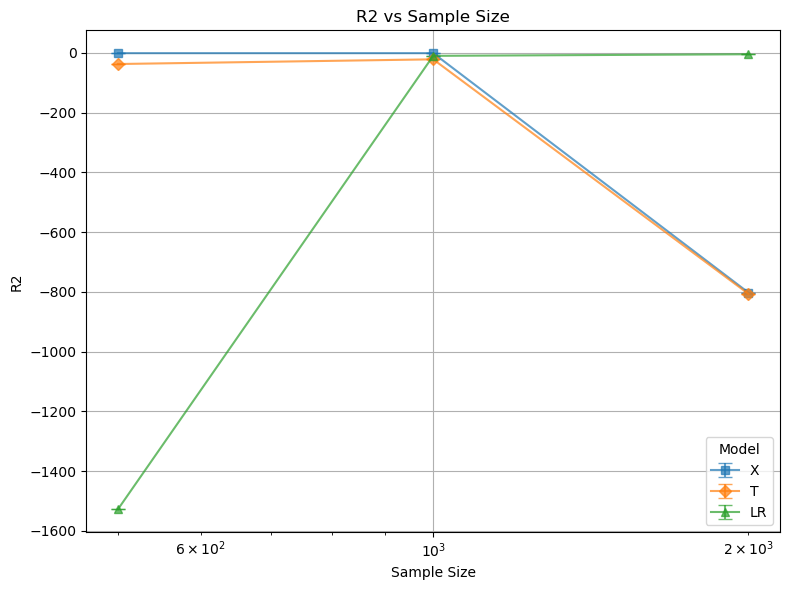

,Sample Size,Model,Metric,Mean,STD,Median,MAD
9,500,X,r2,-0.502216,0.627006,-0.263531,0.467984
21,1000,X,r2,-0.483988,0.447080,-0.391730,0.326920
33,2000,X,r2,-802.547573,5564.055159,-2.519862,1557.930085


In [52]:
df = pd.read_csv('Scripts/results/Test 1 Small Sample/results.csv')
plot_metric(df, 'Sample Size', 'r2', ['X','T', 'LR'], log_x=True)
df[(df['Metric'] == 'r2') & (df['Model'] == 'X')]

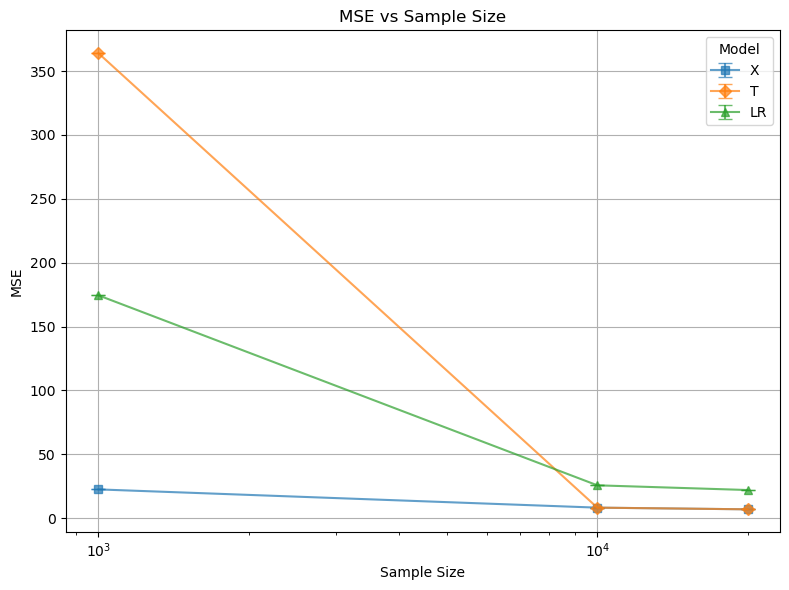

,Sample Size,Model,Metric,Mean,STD,Median,MAD
9,1000,X,r2,-0.415730,0.605189,-0.298445,0.369697
21,10000,X,r2,0.482782,0.051942,0.488195,0.040286
33,20000,X,r2,0.564985,0.018761,0.564029,0.014825


In [53]:
df = pd.read_csv('Scripts/results/Test 1 Large Sample/results.csv')
plot_metric(df, 'Sample Size', 'mse', ['X','T', 'LR'], log_x=True)
df[(df['Metric'] == 'r2') & (df['Model'] == 'X')]

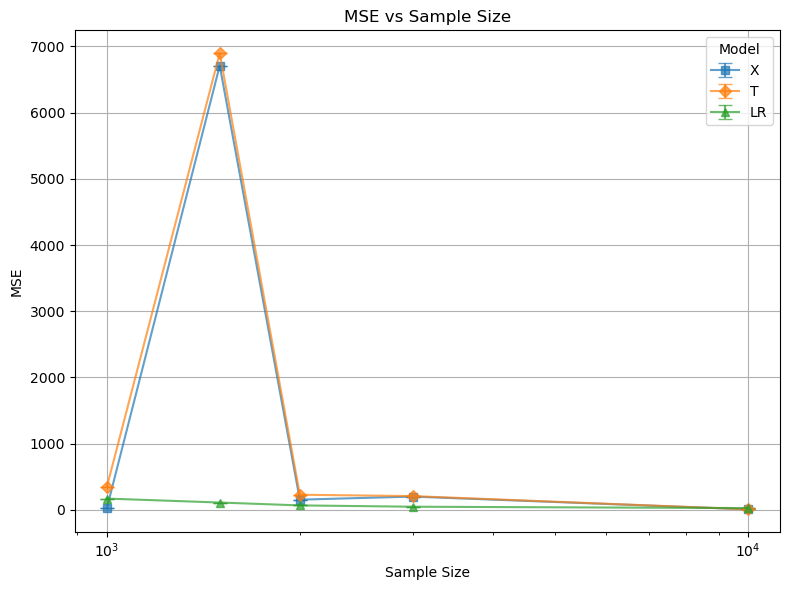

,Sample Size,Model,Metric,Mean,STD,Median,MAD
1,1000,X,mse,23.673604,8.477595,21.666080,6.371834
13,1500,X,mse,6708.935061,46692.508821,26.886760,13073.899271
25,2000,X,mse,154.152915,565.649094,45.174178,173.834278
37,3000,X,mse,200.387797,617.032722,21.558841,305.746872
49,10000,X,mse,8.206546,0.794425,8.038004,0.623193


In [45]:
df = pd.read_csv('Scripts/results/Test 1 Medium Sample/results.csv')
plot_metric(df, 'Sample Size', 'mse', ['X','T', 'LR'], log_x=True)
df[(df['Metric'] == 'mse') & (df['Model'] == 'X')]

# Simulation 1: Unbalanced Case with a simple CATE

### µ0(x) = xTβ + 5 I(x1 > 0.5), with β ∼ Unif [−5, 5]20
### τ (x) = 8 I(x2 > 0.1)

#### Paper Results: X-Learner Outperforms CF, S, and T

n = 1000, 2000, 10000

In [9]:
df = pd.read_csv('Scripts/results/Kunzel1/results.csv')

## LR Models

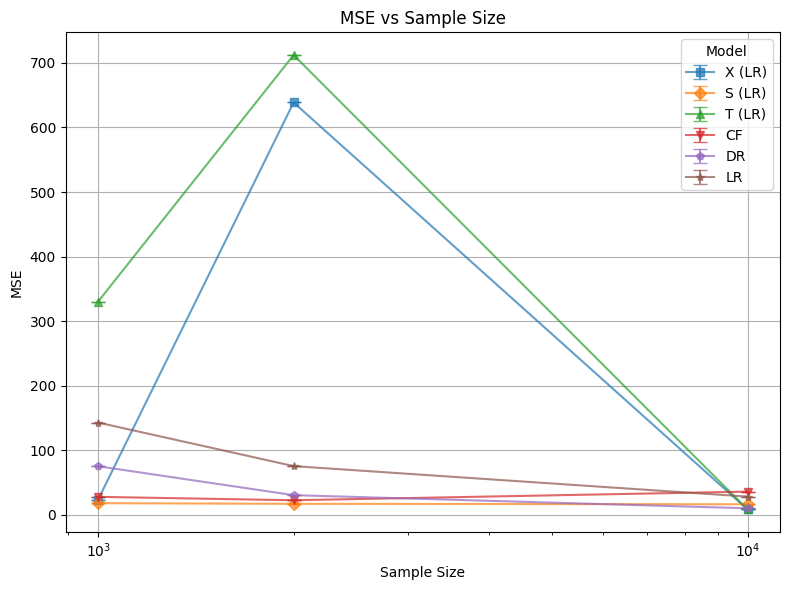

In [10]:
plot_metric(df, 'Sample Size', 'mse', ['X (LR)','S (LR)', 'T (LR)', 'CF', 'DR'], log_x=True)

## RF Models

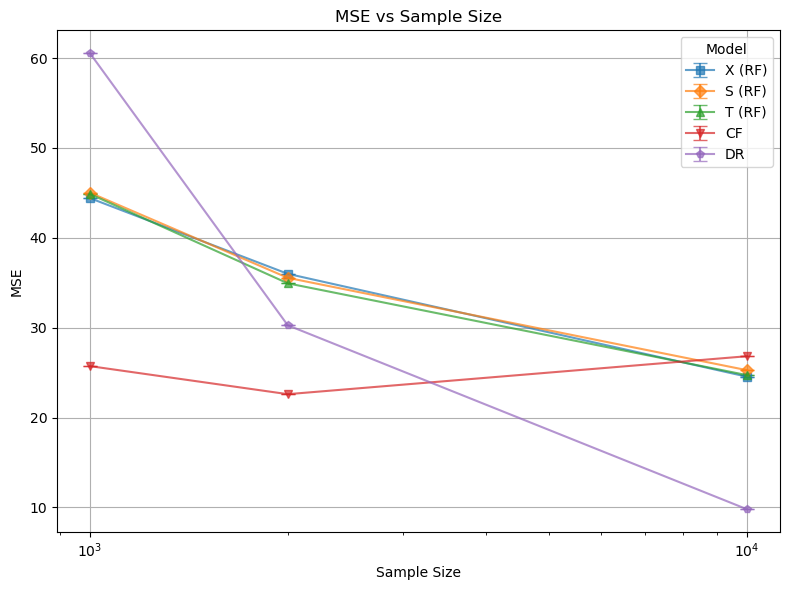

In [194]:
plot_metric(df, 'Sample Size', 'mse', ['X (RF)','S (RF)', 'T (RF)', 'CF', 'DR'], log_x=True)

## LR vs. RF Models

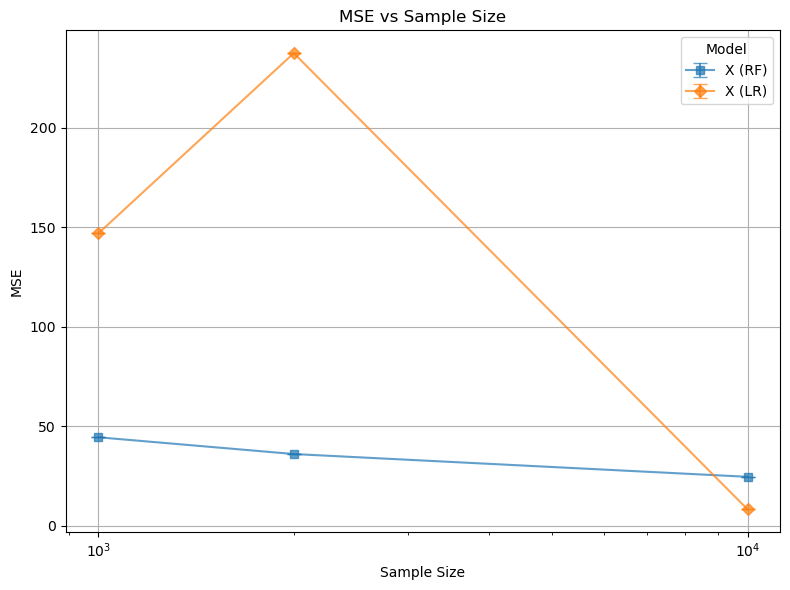

In [195]:
plot_metric(df, 'Sample Size', 'mse', ['X (RF)','X (LR)'], log_x=True)

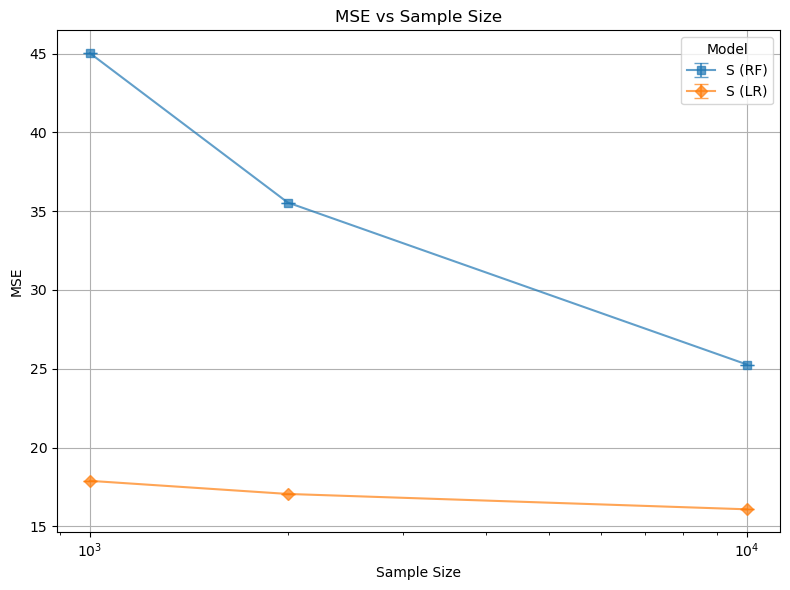

In [196]:
plot_metric(df, 'Sample Size', 'mse', ['S (RF)','S (LR)'], log_x=True)

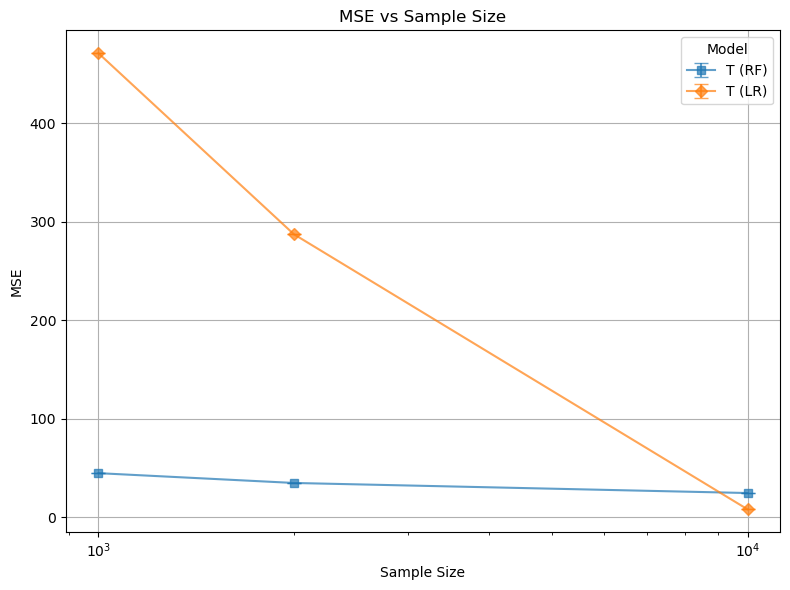

In [197]:
plot_metric(df, 'Sample Size', 'mse', ['T (RF)','T (LR)'], log_x=True)

# Simulation 2: Balanced Case with a complex non-linear CATE

### µ1(x) = 1/2ς(x1)ς(x2)
### µ0(x) = −1/2ς(x1)ς(x2)

#### Paper Results: X > S=T > CF, but differences negligible

In [70]:
df = pd.read_csv('Scripts/results/Kunzel2/results.csv')

## LR Models

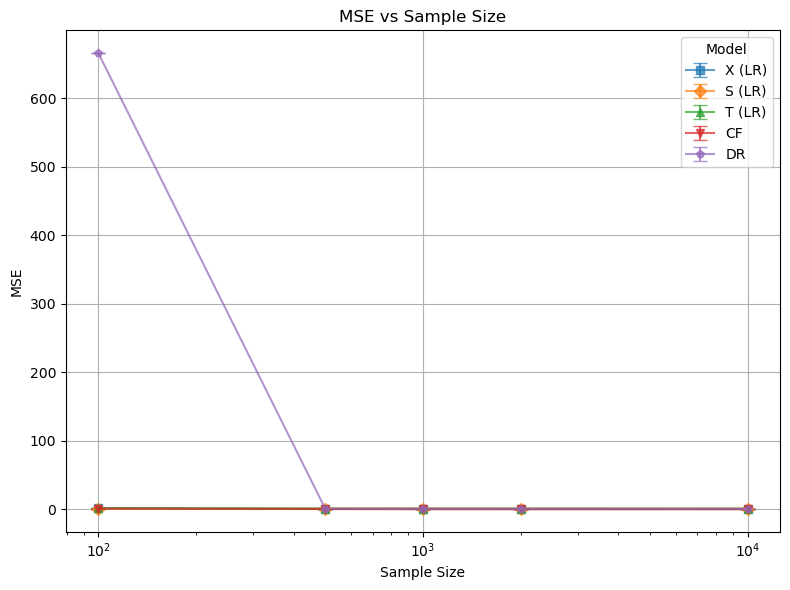

In [199]:
plot_metric(df, 'Sample Size', 'mse', ['X (LR)','S (LR)', 'T (LR)', 'CF', 'DR'], log_x=True)

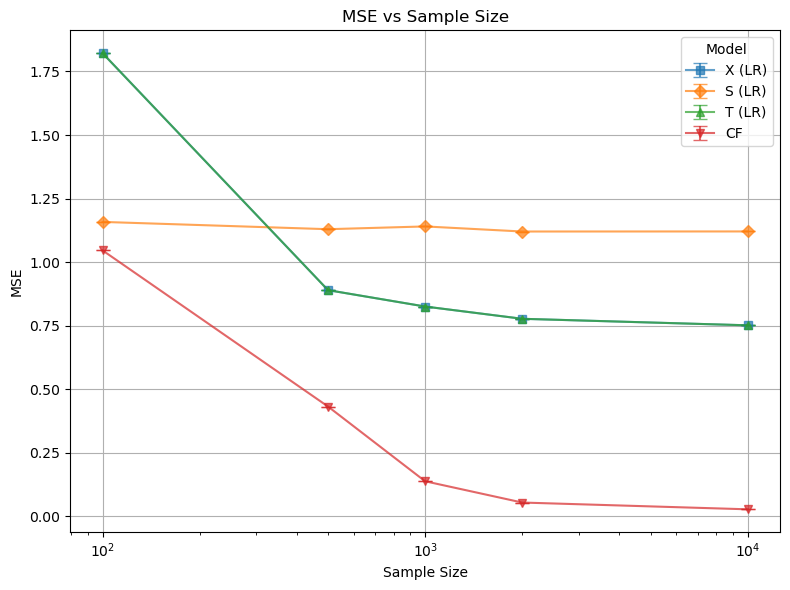

In [200]:
plot_metric(df, 'Sample Size', 'mse', ['X (LR)','S (LR)', 'T (LR)', 'CF'], log_x=True)

## RF Models

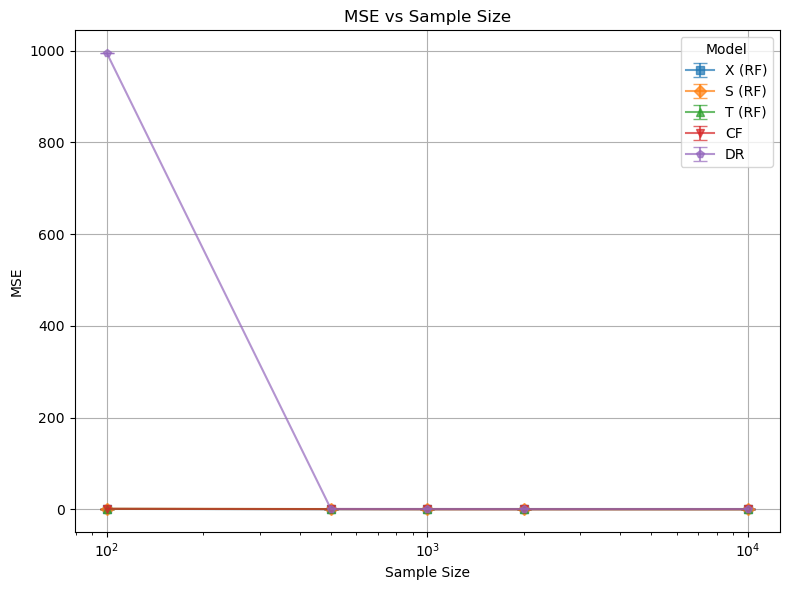

In [74]:
plot_metric(df, 'Sample Size', 'mse', ['X (RF)','S (RF)', 'T (RF)', 'CF', 'DR'], log_x=True)

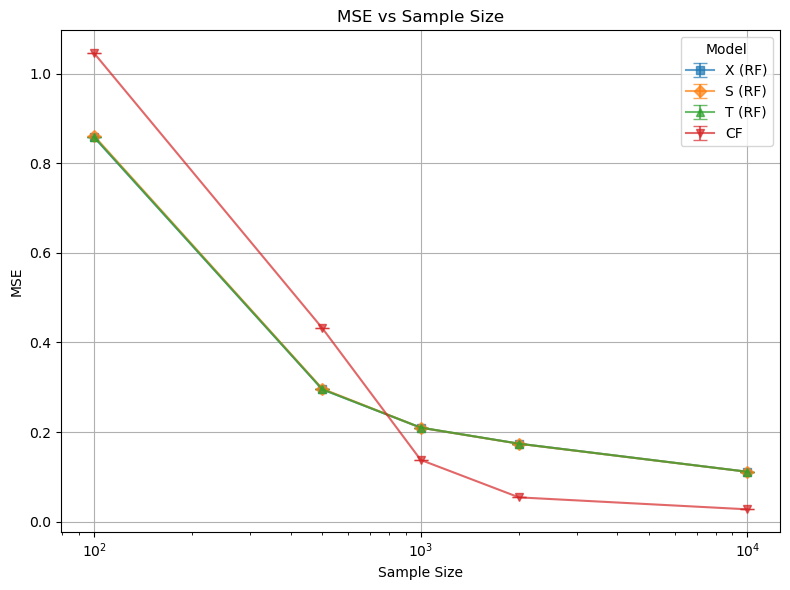

In [202]:
plot_metric(df, 'Sample Size', 'mse', ['X (RF)','S (RF)', 'T (RF)', 'CF'], log_x=True)

## RF vs. LR Models

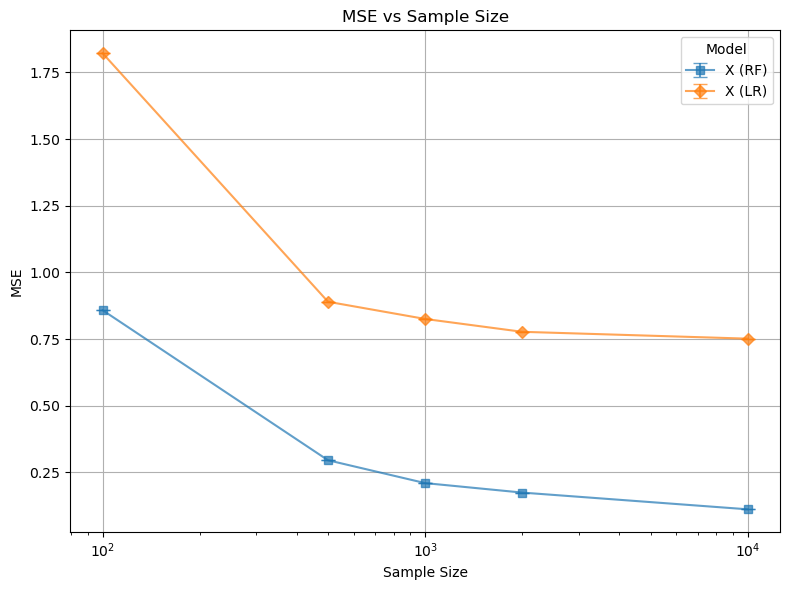

In [203]:
plot_metric(df, 'Sample Size', 'mse', ['X (RF)','X (LR)'], log_x=True)

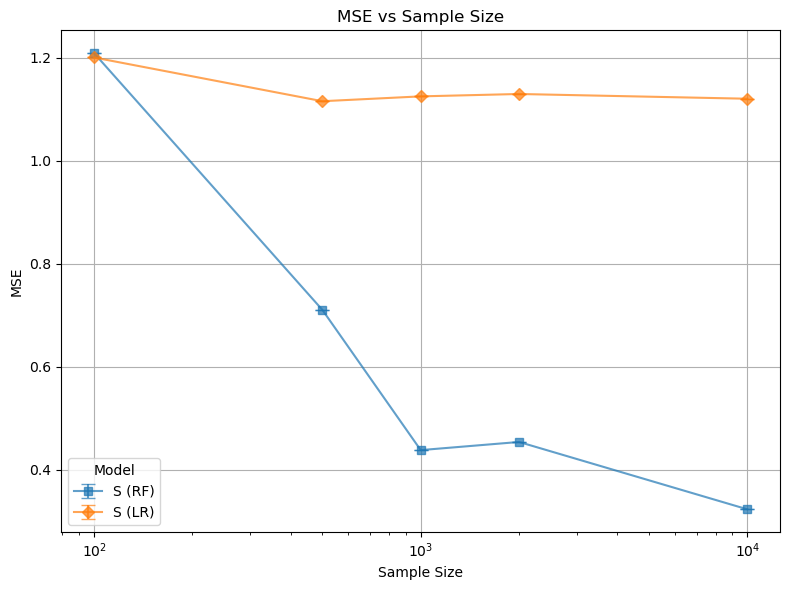

In [64]:
plot_metric(df, 'Sample Size', 'mse', ['S (RF)','S (LR)'], log_x=True)

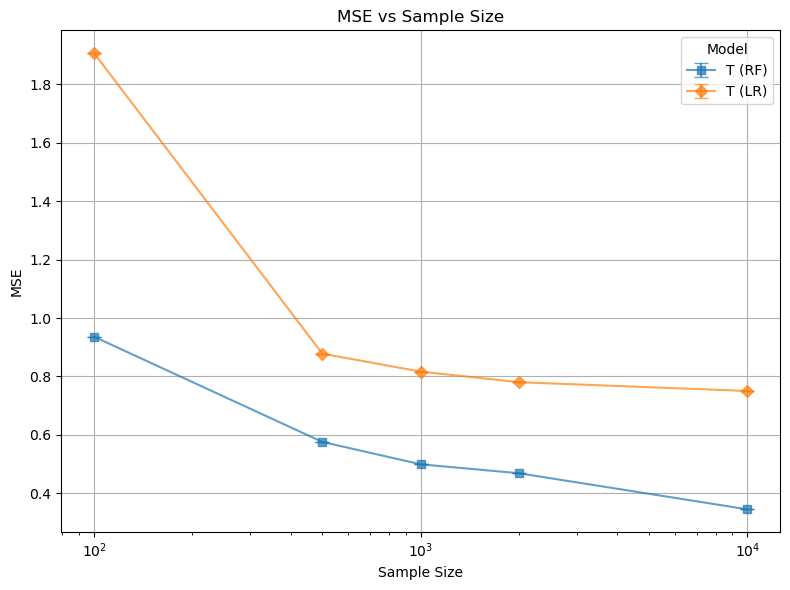

In [61]:
plot_metric(df, 'Sample Size', 'mse', ['T (RF)','T (LR)'], log_x=True)

# Simulation 3: Balanced case, with complex linear CATE

###  µ1(x) = xTβ1, with β1 ∼ Unif([1, 30]20)
### µ0(x) = xT β0, with β0 ∼ Unif([1, 30]20)

#### Paper Results: CF, T, X > S, but difference negligible

In [206]:
df = pd.read_csv('Scripts/results/Kunzel3/results.csv')

## LR Models

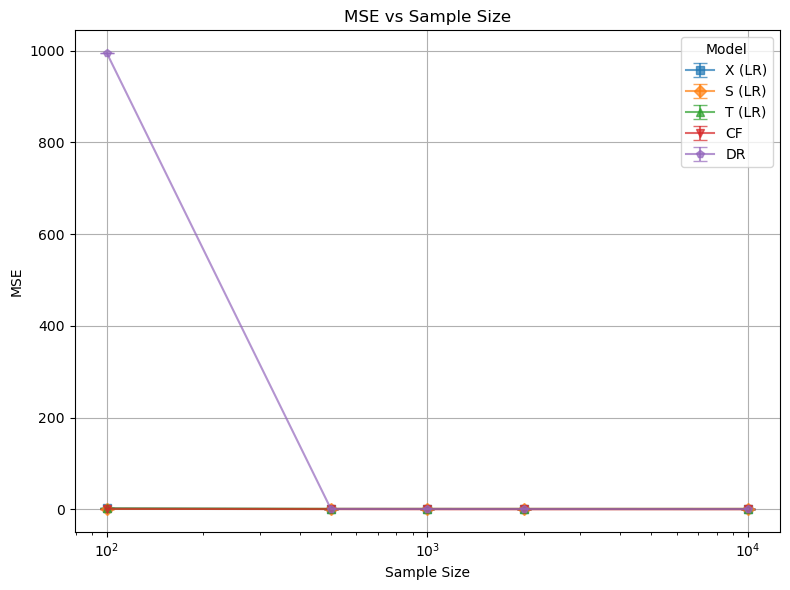

In [66]:
plot_metric(df, 'Sample Size', 'mse', ['X (LR)','S (LR)', 'T (LR)', 'CF', 'DR'], log_x=True)

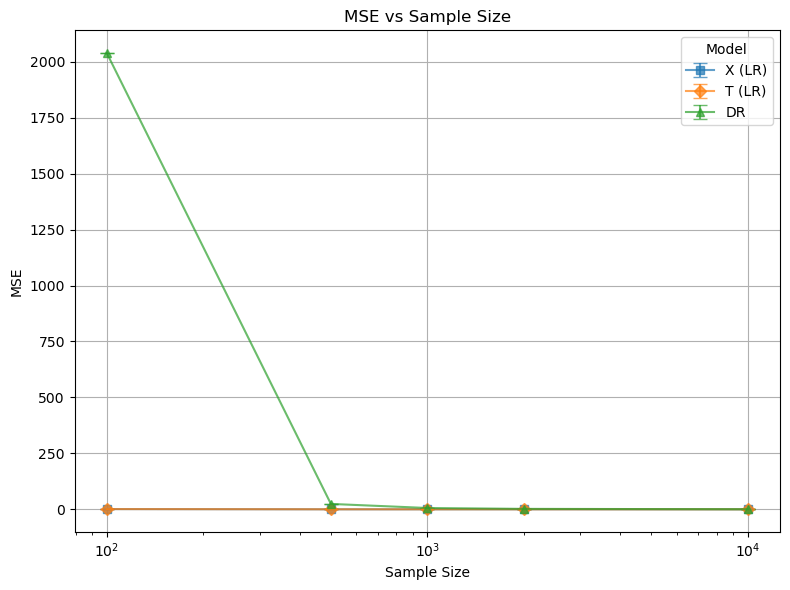

In [208]:
plot_metric(df, 'Sample Size', 'mse', ['X (LR)', 'T (LR)', 'DR'], log_x=True)

## RF Models

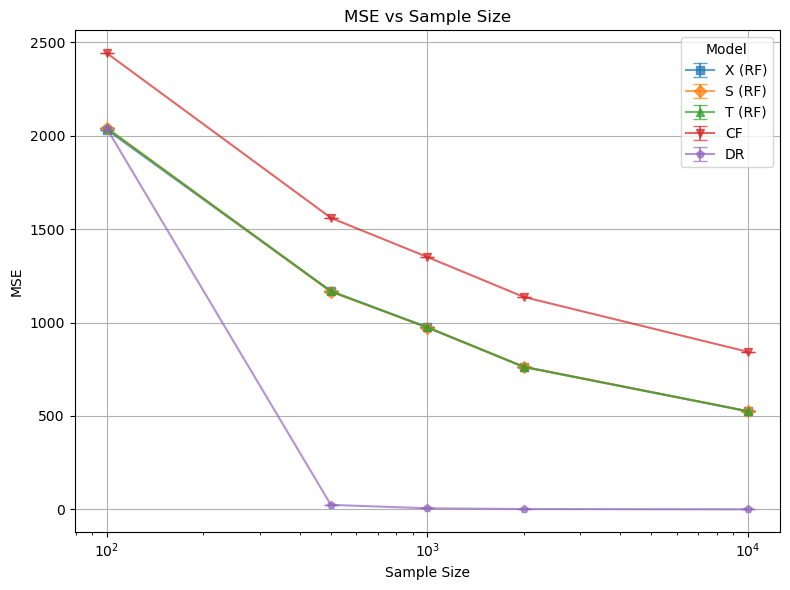

In [209]:
plot_metric(df, 'Sample Size', 'mse', ['X (RF)','S (RF)', 'T (RF)', 'CF', 'DR'], log_x=True)

## RF vs. LR Models

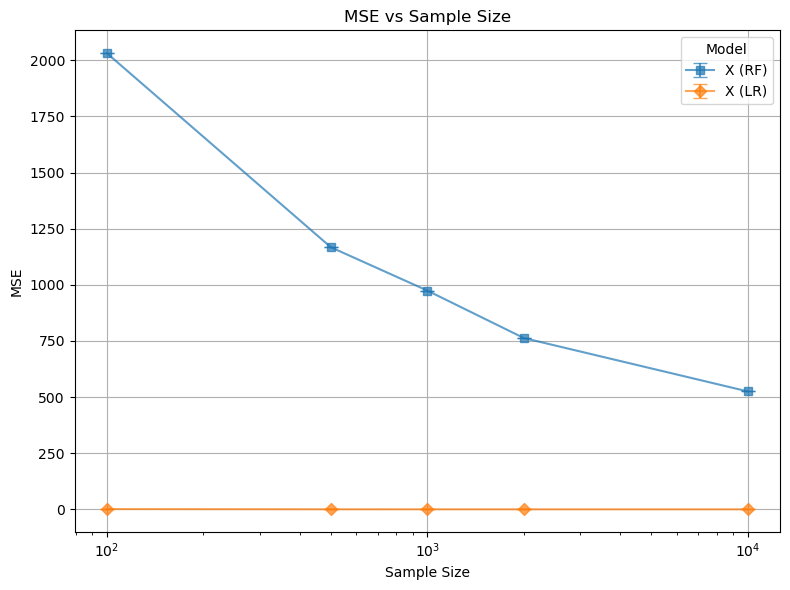

In [210]:
plot_metric(df, 'Sample Size', 'mse', ['X (RF)','X (LR)'], log_x=True)

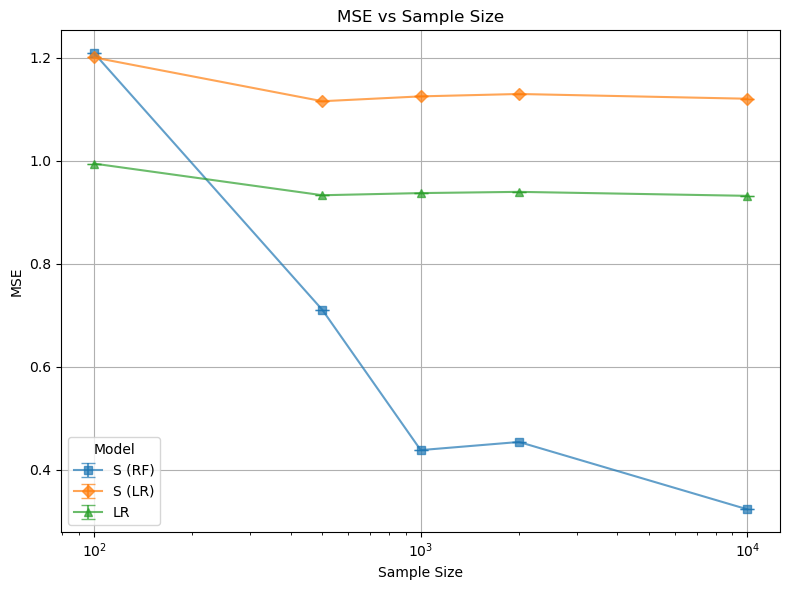

In [69]:
plot_metric(df, 'Sample Size', 'mse', ['S (RF)','S (LR)', 'LR'], log_x=True)

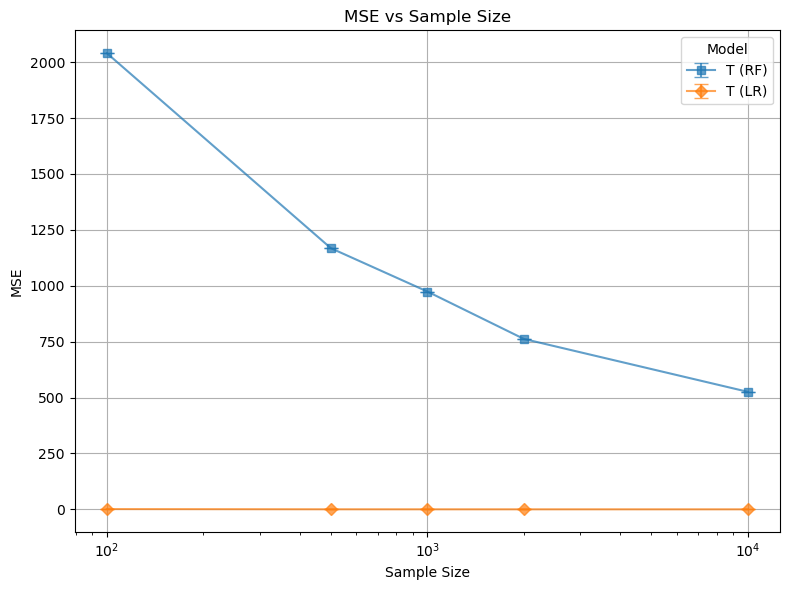

In [212]:
plot_metric(df, 'Sample Size', 'mse', ['T (RF)','T (LR)'], log_x=True)

# Simulation 4: No Treatment effect, global linear CATE

### μ0(x) = xT β, with β ∼ Unif([1, 30]5)

#### Paper results: S > X = CF > T

In [213]:
df = pd.read_csv('Scripts/results/Kunzel4/results.csv')

## LR Models

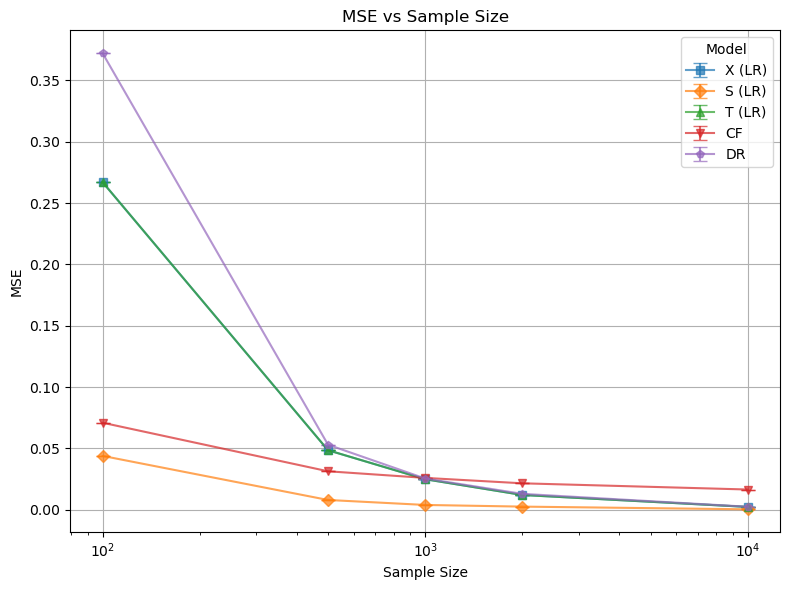

In [214]:
plot_metric(df, 'Sample Size', 'mse', ['X (LR)','S (LR)', 'T (LR)', 'CF', 'DR'], log_x=True)

## RF Models

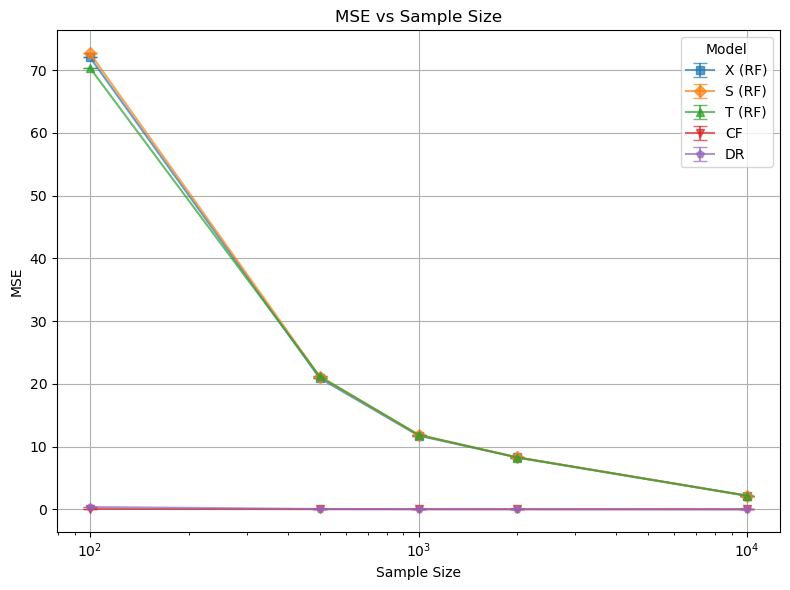

In [215]:
plot_metric(df, 'Sample Size', 'mse', ['X (RF)','S (RF)', 'T (RF)', 'CF', 'DR'], log_x=True)

## RF vs. LR Models

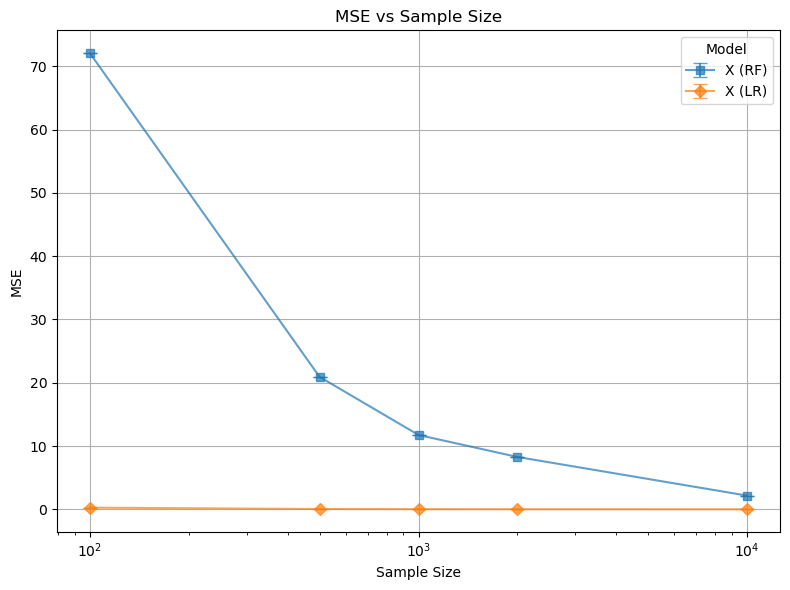

In [216]:
plot_metric(df, 'Sample Size', 'mse', ['X (RF)','X (LR)'], log_x=True)

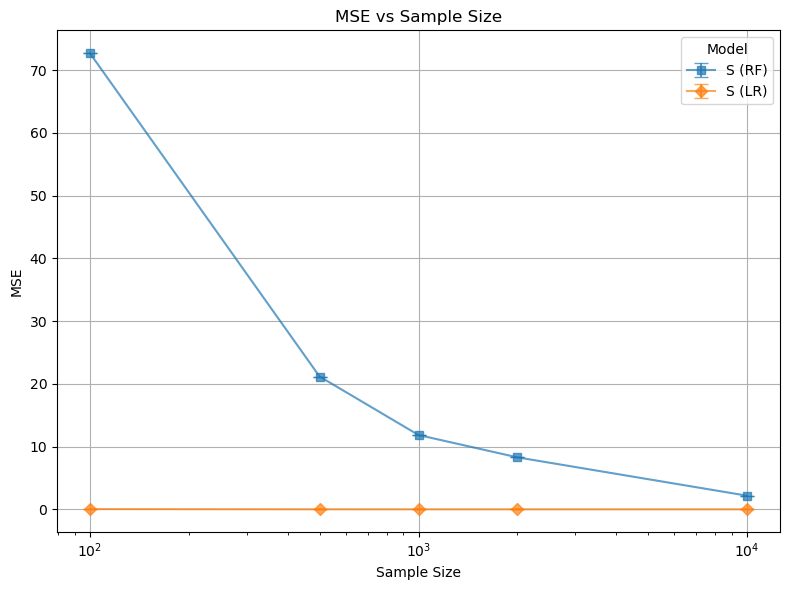

In [217]:
plot_metric(df, 'Sample Size', 'mse', ['S (RF)','S (LR)'], log_x=True)

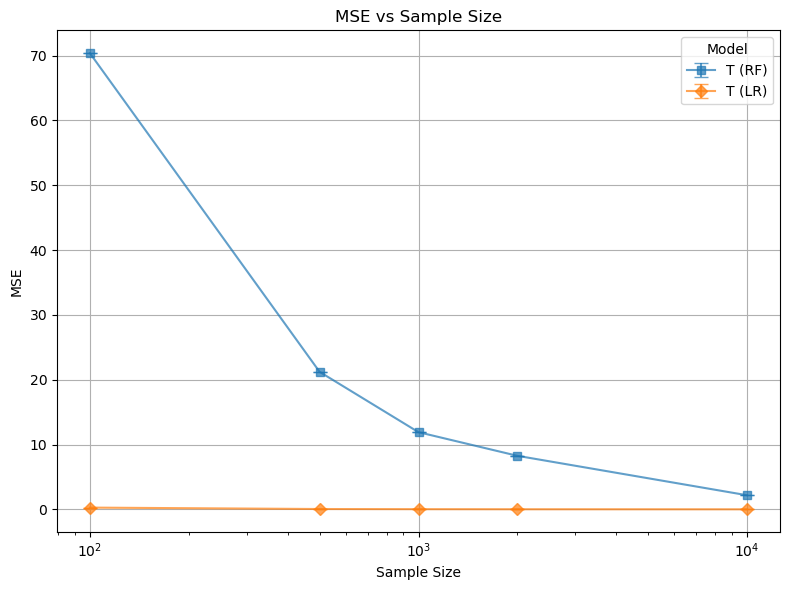

In [218]:
plot_metric(df, 'Sample Size', 'mse', ['T (RF)','T (LR)'], log_x=True)

# Simulation 5: Beta Confounded Case with non-constant propensity score

### μ0(x) = 2x1 − 1, μ1(x) = μ0(x)
### e(x) = 1/4 * (1 + β(x1,2,4)), β(x1,2,4) is the β distribution with parameters 2 and 4.

#### Paper Results: "None of the algorithms performs significantly worse under confounding. We do not show the performance of causal forests, because—as noted by the authors—it is not designed for observational studies with only conditional unconfoundedness and it would not be fair to compare it here"

In [219]:
df = pd.read_csv('Scripts/results/Kunzel5/results.csv')

# LR Models

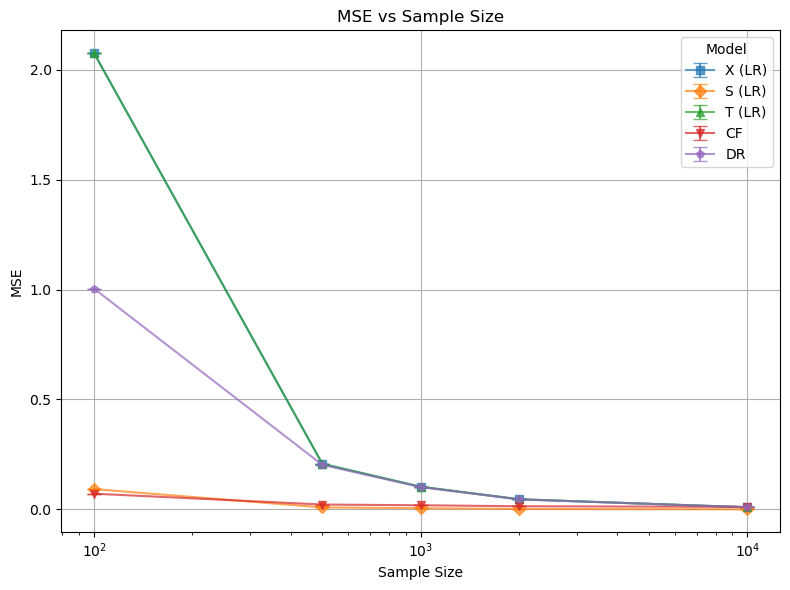

In [220]:
plot_metric(df, 'Sample Size', 'mse', ['X (LR)','S (LR)', 'T (LR)', 'CF', 'DR'], log_x=True)